<h1 style="text-align:center;">Introdução à Otimização</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Aluno: Wagner Franco da Silva Junior

In [42]:
@time using Clp
@time using JuMP
@time using Plots
@time using GLPK

  0.249955 seconds (152 allocations: 14.773 KiB)
  0.000401 seconds (152 allocations: 14.773 KiB)
  0.000180 seconds (152 allocations: 14.773 KiB)
  0.000412 seconds (152 allocations: 14.773 KiB)


In [43]:
versioninfo()

Julia Version 1.10.5
Commit 6f3fdf7b362 (2024-08-27 14:19 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 4 × Intel(R) Core(TM) i3-7020U CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 4 virtual cores)
Environment:
  JULIA_NUM_THREADS = 


## Problema 1: (Solução de sistema linear via LP e forma padrão) 

Considere o sistema de equações lineares abaixo:

$$
\begin{array}{rlr}
2x_1 - x_2 + x_3 & = & 2\\
3x_1 + 5x_2 + 5x_3 & = & 3.5 \\
x_1 + x_2 + x_3 & = & 0.5
\end{array}
$$

 - Determina a solução do sistema transformando-o em programa linear (PL), utilizando JuMP/Julia. _Dica_: Utilize o conjunto de "Transformation tricks" (slides 3-21 em diante). O desafio passa a ser a definição de uma função objetivo adequada!
 - Escreva o PL que você definiu no item anterior na forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as soluções obtidas.

### Solução do Problema 1

Para formular o problema como um programa linear, primeiro se faz necessário a escolha de uma função custo adequada ao problema, dessa forma será utilizada a soma das variáveis de forma que não aja nenhum peso e simplifique a otimização, garantindo uma factibilidade maior.
 
\begin{align*}
\text{minimizar} \quad & x_1 + x_2 + x_3 \\
\text{sujeito a} \quad & 2x_1 - x_2 + x_3 = 2 \\
& 3x_1 + 5x_2 + 5x_3 = 3.5 \\
& x_1 + x_2 + x_3 = 0.5 \\
& x_1, x_2, x_3 \in \mathbb{R}
\end{align*}

In [44]:
m = Model(Clp.Optimizer)
@variable(m, x1)
@variable(m, x2)
@variable(m, x3)
@constraint(m, 2x1 - x2 + x3 == 2)
@constraint(m, 3x1 + 5x2 + 5x3 == 3.5)
@constraint(m, x1 + x2 + x3 == 0.5)
@objective(m, Min, x1 + x2 + x3)

optimize!(m)

println(m)
println()
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))

Min x1 + x2 + x3
Subject to
 2 x1 - x2 + x3 = 2
 3 x1 + 5 x2 + 5 x3 = 3.5
 x1 + x2 + x3 = 0.5


x1 = -0.5
x2 = -1.0
x3 = 2.0
Coin0506I Presolve 0 (-3) rows, 0 (-3) columns and 0 (-9) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 0.5
Coin0511I After Postsolve, objective 0.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.5 - 0 iterations time 0.002, Presolve 0.00


### Forma Padrão de Programação Linear

Colocando o programa linear na forma padrão temos que escrever na forma matricial e limitar $$\mathbf{A} \mathbf{x} \leq \mathbf{b}$$
Dessa forma tem-se a seguinte representação:



maximizar:

$$
\mathbf{c}^\top \mathbf{x} = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
$$

sujeito a:

$$
\begin{bmatrix} 
2 & -1 & 1 \\ 
3 & 5 & 5 \\ 
1 & 1 & 1 
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \leq \begin{bmatrix} 2 \\ 3.5 \\ 0.5 \end{bmatrix}
$$
$$
x_1, x_2, x_3 \geq 0
$$

In [45]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@constraint(m, 2x1 - x2 + x3 <= 2)
@constraint(m, 3x1 + 5x2 + 5x3 <= 3.5)
@constraint(m, x1 + x2 + x3 <= 0.5)
@objective(m, Max, x1 + x2 + x3)

optimize!(m)

println(m)
println()
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))

Max x1 + x2 + x3
Subject to
 2 x1 - x2 + x3 ≤ 2
 3 x1 + 5 x2 + 5 x3 ≤ 3.5
 x1 + x2 + x3 ≤ 0.5
 x1 ≥ 0
 x2 ≥ 0
 x3 ≥ 0


x1 = 0.0
x2 = 0.5
x3 = 0.0
Coin0506I Presolve 2 (-1) rows, 2 (-1) columns and 4 (-5) elements
Clp0006I 0  Obj -0 Dual inf 1.999998 (2)
Clp0006I 2  Obj 0.5
Clp0000I Optimal - objective value 0.5
Coin0511I After Postsolve, objective 0.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.5 - 2 iterations time 0.002, Presolve 0.00


Os resultados se diferem pelo fato de que na programação linear tem-se primeiramente uma minimização e sem nenhuma restrição de negatividade, quanto que com a forma padrão foi feita uma maximização na função custo com as restrições de $$ x \geq 0$$ e $$\mathbf{A} \mathbf{x} \leq \mathbf{b}$$

## Problema 2: (Tipos de PL)

Determine o tipo (inviável, solução ilimitada, solução ótima limitada) dos seguintes PL. Mostre sua resolução de cada caso graficamente.
$$
\begin{array}{rcl}
\text{maximize}   & x_1 + x_2  &   \\
\text{sujeito a}  & 2x_1 + x_2 & \leq 1 \\
                  & x_1 + x_2  & \geq 2 \\
                  & x_1,x_2    & \geq 0
\end{array}
$$

--------------------------------------------

$$
\begin{array}{rcl}
\text{maximize}   & 3x_1 + x_2  &   \\
\text{sujeito a}  & 2x_1 + x_2 & \geq 1 \\
                  & x_1,x_2    & \geq 0
\end{array}
$$

--------------------------------------------

$$
\begin{array}{rcl}
\text{maximize}   & 12x_1 + 10x_2  &   \\
\text{sujeito a}  & x_1 + x_2 & \leq 20 \\
                  & 0.5x_1 + x_2   & \leq 12 \\
                  & \frac{1}{16}x_1 + \frac{1}{24}x_2   & \leq 1 \\
                  & 12x_1 - 8x_2  & \geq 0 \\
                  &  x_1,x_2  & \geq 0
\end{array}
$$


### Solução do Problema 2

In [46]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, 2x1 + x2 <= 1)
@constraint(m, x1 + x2 >= 2)
@objective(m, Max, x1 + x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)

Status da Solução: INFEASIBLE
Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 1.9999999 (1) Dual inf 1.9999998 (2)
Clp0006I 1  Obj 0 Primal inf 0.9999999 (1)
Clp0001I Primal infeasible - objective value 0
Clp0032I PrimalInfeasible objective 0 - 1 iterations time 0.002


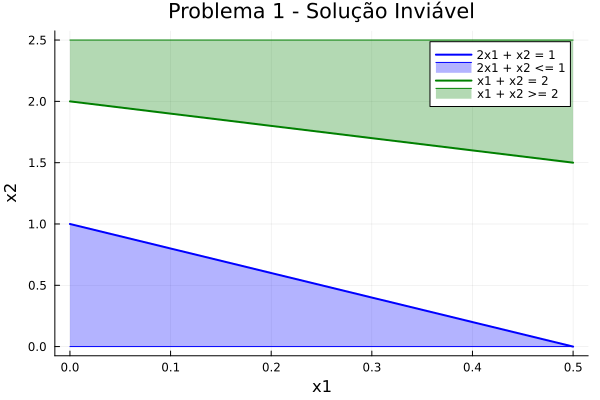

In [47]:
x1 = 0:0.1:0.5

x2_1 = 1 .- 2 .* x1

x2_upper = fill(2.5, length(x1))
x2_lower = fill(0,   length(x1))

x2_2 = 2 .- x1

plot(x1, x2_1, label="2x1 + x2 = 1", color=:blue, linewidth=2)
plot!(x1, x2_lower, fillrange=x2_1, fillalpha=0.3, label="2x1 + x2 <= 1", color=:blue)
plot!(x1, x2_2, label="x1 + x2 = 2", color=:green, linewidth=2)
plot!(x1, x2_upper, fillrange=x2_2, fillalpha=0.3, label="x1 + x2 >= 2", color=:green)

xlabel!("x1")
ylabel!("x2")
title!("Problema 1 - Solução Inviável")

plot!()

Com base nessa representação gráfica, notamos que esse primeiro problema é inviável, pois não há intersecção entre essas retas de forma que fique abaixo da reta azul e acima da reta verde

In [48]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, 2x1 + x2 >= 1)
@objective(m, Max, 3x1 + x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)

Status da Solução: DUAL_INFEASIBLE
Coin0508I Presolve thinks problem is unbounded
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 0.9999999 (1) Dual inf 3.9999998 (2)
Clp0002I Dual infeasible - objective value 4e+10
Clp0032I DualInfeasible objective 4e+10 - 0 iterations time 0.002


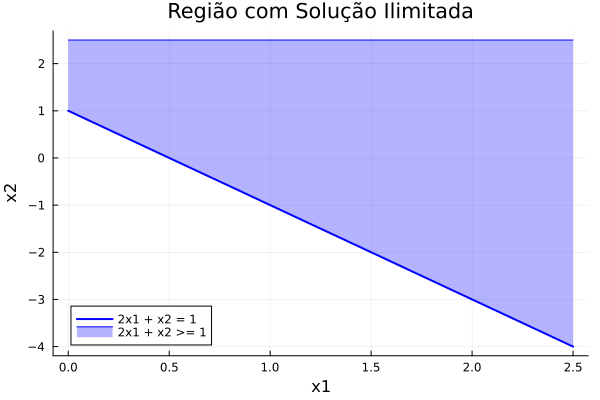

In [49]:
x1 = 0:0.1:2.5

x2_eq = 1 .- 2 .* x1

x2_upper = fill(2.5, length(x1))

plot(x1, x2_eq, label="2x1 + x2 = 1", color=:blue, linewidth=2)

plot!(x1, x2_upper, fillrange=x2_eq, fillalpha=0.3, label="2x1 + x2 >= 1", color=:blue)

xlabel!("x1")
ylabel!("x2")
title!("Região com Solução Ilimitada")

Com essa representação percebemos que para esse problema não há solução exata pois para $2x_1 + x_2 \geq 1$ existem infinitas soluções.

In [50]:
m = Model(Clp.Optimizer)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, x1 + x2 <= 20)
@constraint(m, 0.5x1 + x2 <= 12)
@constraint(m, x1/16 + x2/24 <= 1)
@constraint(m, 12x1 - 8x2 >= 0)
@objective(m, Max, 12x1 + 10x2)

optimize!(m)

status = termination_status(m)
println("Status da Solução: ", status)

Status da Solução: OPTIMAL
Coin0506I Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
Clp0006I 0  Obj 0 Dual inf 22 (2)
Clp0006I 3  Obj 204
Clp0000I Optimal - objective value 204
Clp0032I Optimal objective 204 - 3 iterations time 0.002


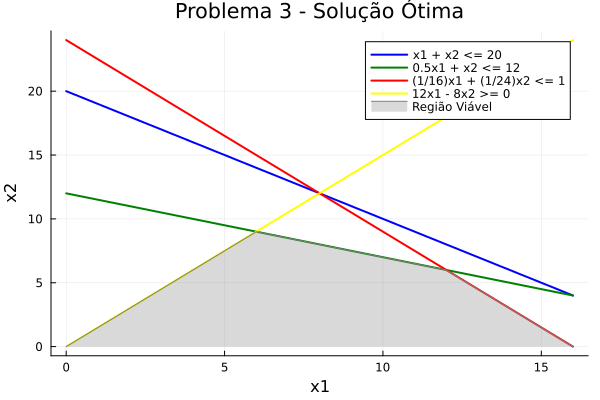

In [51]:
x1 = 0:0.1:16

x2_1 = 20 .- x1
x2_2 = 12 .- 0.5 .* x1
x2_3 = 24*(1 .- (1/16) .* x1)
x2_4 = (12/8) .* x1

function intersection(x2_a, x2_b)
    x = (x2_b .- x2_a) ./ 2
    return x
end

x2_fill = [minimum([x2_1[i], x2_2[i], x2_3[i], x2_4[i]]) for i in 1:length(x1)]

plot(x1, x2_1, label="x1 + x2 <= 20", color=:blue, linewidth=2)
plot!(x1, x2_2, label="0.5x1 + x2 <= 12", color=:green, linewidth=2)
plot!(x1, x2_3, label="(1/16)x1 + (1/24)x2 <= 1", color=:red, linewidth=2)
plot!(x1, x2_4, label="12x1 - 8x2 >= 0", color=:yellow, linewidth=2)

plot!(x1, x2_fill, fillrange=0, fillalpha=0.3, label="Região Viável", color=:gray)

xlabel!("x1")
ylabel!("x2")
title!("Problema 3 - Solução Ótima")

plot!()

Para esse problema existe uma intersecção entre as restrições, dessa forma encontra-se uma solução ótima viável para o problema.

## Problema 3: (Poliedro convexo como conjunto viável $\{x: Ax \leq b\}$ )

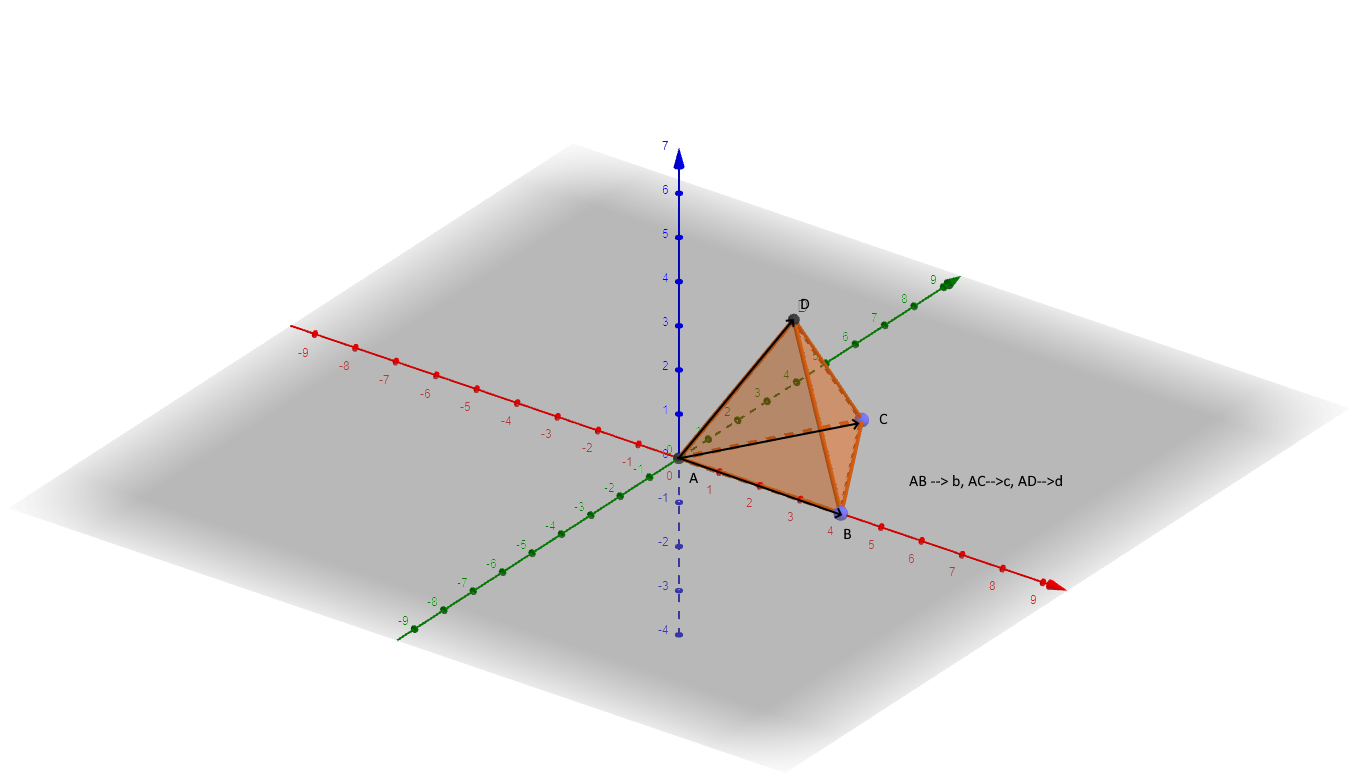

Foi visto em sala de aula que, para qualquer matriz $A \in R^{m \times n}$, $b \in R^m, x \in R^n$, o conjunto $\{x : Ax \leq b\}$ é um poliedro convexo. Este exercício pede para investigar o caminho inverso.
O tetraedro da figura acima possui vértices $A = (0,0,0)$, $B= (4,0,0)$, $C=(2,3.46,0)$ e $D= (2,1.15,3.27)$. Você consegue representá-lo na forma de um conjunto $\{x : Ax \leq b\}$? Caso afirmativo, mostre os cálculos levando à matriz $A$ e ao vetor $b$.

Sugestão: Como o ponto $A$ está na origem, denotamos por $b,c,d$ os vetores $AB,AC,AD$. Três das quatro faces do tetraedro são combinações convexas de pares distintos dos vetores $b,c,d$, i.e., dos pares $\{b,c\}$, $\{b,d\}$ e $\{c,d\}$. A quarta face $BCD$ requer um pouco mais de trabalho...

### Solução do Problema 3

## Problema 4: (Solução gráfica de PL parametrizado)

Encontre graficamente todos os valores do parâmetro $a$ tais que $(-3,4)$ seja a solução ótima do seguinte PL:
\begin{array}{rl}
    \text{maximize} & ax_1 + (2-a)x_2  \\
    \text{sujeito a}& 4x_1 + 3x_2 \leq 0 \\
              & 2x_1 + 3x_2       \leq 7 \\
              & x_1  + x_2        \leq 1
\end{array}
Verifique sua solução com código em JuMP.

### Solução do Problema 4

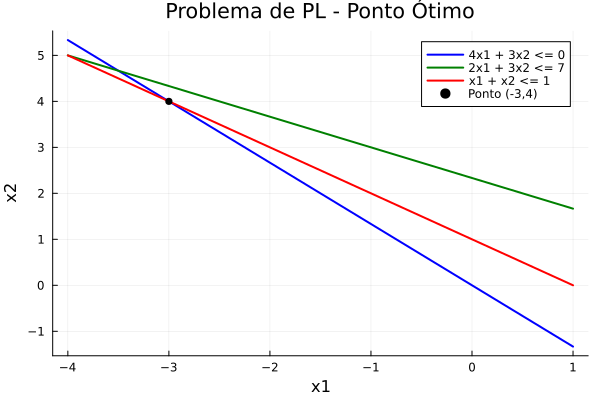

In [53]:
x1 = -4:0.1:1

x2_1 = (- 4 .* x1) ./ 3        # 4x1 + 3x2 <= 0
x2_2 = (7 .- 2 .* x1) ./ 3     # 2x1 + 3x2 <= 7
x2_3 = 1 .- x1                 # x1 + x2 <= 1

plot(x1, x2_1, label="4x1 + 3x2 <= 0", color=:blue, linewidth=2)
plot!(x1, x2_2, label="2x1 + 3x2 <= 7", color=:green, linewidth=2)
plot!(x1, x2_3, label="x1 + x2 <= 1", color=:red, linewidth=2)

scatter!([-3], [4], label="Ponto (-3,4)", color=:black, marker=:circle)

xlabel!("x1")
ylabel!("x2")
title!("Problema de PL - Ponto Ótimo")

plot!()

In [54]:
model = Model(GLPK.Optimizer)

@variable(model, x1)
@variable(model, x2)

@constraint(model, 4x1 + 3x2 <= 0)
@constraint(model, 2x1 + 3x2 <= 7)
@constraint(model, x1 + x2 <= 1)

function check_solution_for_a(a_value)
    @objective(model, Max, a_value * x1 + (2 - a_value) * x2)

    optimize!(model)
    
    return value(x1), value(x2), objective_value(model)
end

for a_value in -5:5
    x1_sol, x2_sol, obj_val = check_solution_for_a(a_value)
    println("Para a = $a_value: solução = ($x1_sol, $x2_sol), valor objetivo = $obj_val")
end


Para a = -5: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 28.99999999999999
Para a = -4: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 23.999999999999993
Para a = -3: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 18.999999999999993
Para a = -2: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 13.999999999999995
Para a = -1: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 8.999999999999996
Para a = 0: solução = (-2.999999999999999, 1.9999999999999991), valor objetivo = 3.9999999999999982
Para a = 1: solução = (-3.9999999999999987, 4.999999999999999), valor objetivo = 1.0000000000000004
Para a = 2: solução = (3.000000000000001, -4.000000000000001), valor objetivo = 6.000000000000002
Para a = 3: solução = (3.000000000000001, -4.000000000000001), valor objetivo = 13.000000000000004
Para a = 4: solução = (3.000000000000001, -4.000000000000001), valor objetivo = 20.000000000000007
P

In [55]:
m = Model(Clp.Optimizer)
@variable(m, x1)
@variable(m, x2)
@constraint(m, 4x1 + 3x2 <= 0)
@constraint(m, 2x1 + 3x2 <= 7)
@constraint(m, x1 + x2 <= 1)
a = 1
@objective(m, Max, a * x1 + (2 - a) * x2)

optimize!(m)

println(m)
println()
println("x1 = ", value(x1))
println("x2 = ", value(x2))

Max x1 + x2
Subject to
 4 x1 + 3 x2 ≤ 0
 2 x1 + 3 x2 ≤ 7
 x1 + x2 ≤ 1


x1 = -2.999999999997
x2 = 3.999999999997
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 0.0199998 (2) w.o. free dual inf (0)
Clp0006I 0  Obj 0 Dual inf 0.0199998 (2) w.o. free dual inf (0)
Clp0006I 2  Obj 1
Clp0000I Optimal - objective value 1
Clp0032I Optimal objective 1 - 2 iterations time 0.002


## Problema 5 (Planejamento de produção): 
Uma empresa fabrica 4 produtos diferentes: A, B, C, D. O gerente de produção deve planejar a produção para a próxima semana. Cada produto passa por três etapas: montagem, acabamento e embalagem, de acordo com os dados abaixo

|Etapa $\downarrow$| Produto $\rightarrow$  | A   | B   | C   | D   | Horas/semana disponíveis|
|-----            |-------                 |--   |--   |--   |--   |--    |
| Montagem        |     | 0.70| 0.75| 0.55| 0.34| 400 | 
| Acabamento|| 0.55| 0.82| 0.80| 0.55| 480 | 
| Embalagem || 0.24| 0.32| 0.45| 0.27| 220 | 

Os tempos na tabela são horas necessária para cada etapa e produto. A mesma matéria prima é utilizada para cada produto nas seguintes quantidades: 1.9 unidades para produto A, 2.5 para B, 1.8 para C e 2 para D. No estoque há 1500 unidades de matéria prima disponíveis por semana. Após a dedução dos custos fixos e da matéria prima, o lucro por unidade de produto é R\$ 4.80 (A), 12 (B), 6 (C) e 7.2 (D). A demanda é alta e supões-se que toda a produção sempre será vendida. A empresa já aceitou uma encomenda de 100 unidades do produto A para a próxima semana. Qual deveria ser o plano de produção adotado pelo gerente para maximizar o lucro, dadas as restrições apresentadas acima?


### Solução do Problema 5

Dada as condições acima, tem-se as restrições tanto de horas para cada etapa do processo como também a restrição para a matéria prima disponível, através disso pode-se maximizar o lucro com os valores de cada produto que foi fornecido, dessa forma coloca-se na forma de programação linear para aplicar a otimização através do Julia, assim:

$$
\text{Maximizar} \quad 4.80x_A + 12x_B + 6x_C + 7.2x_D
$$

Sujeito a:

$$
0.70x_A + 0.75x_B + 0.55x_C + 0.34x_D \leq 400 \quad (\text{Montagem})
$$

$$
0.55x_A + 0.82x_B + 0.80x_C + 0.55x_D \leq 480 \quad (\text{Acabamento})
$$

$$
0.24x_A + 0.32x_B + 0.45x_C + 0.27x_D \leq 220 \quad (\text{Embalagem})
$$

$$
1.9x_A + 2.5x_B + 1.8x_C + 2x_D \leq 1500 \quad (\text{Matéria-prima})
$$

$$
x_A \geq 100 \quad (\text{Pedido mínimo para A})
$$

$$
x_A, x_B, x_C, x_D \geq 0 \quad (\text{Não negatividade})
$$


In [57]:
m = Model(GLPK.Optimizer)
@variable(m, A >= 100)
@variable(m, B >= 0)
@variable(m, C >= 0)
@variable(m, D >= 0)
@constraint(m, 0.70A + 0.75B + 0.55C + 0.34D <= 400)
@constraint(m, 0.55A + 0.82B + 0.80C + 0.55D <= 480)
@constraint(m, 0.24A + 0.32B + 0.45C + 0.27D <= 220)
@constraint(m, 1.9A + 2.5B + 1.8C + 2D <= 1500)
@objective(m, Max, 4.80A + 12B + 6C + 7.2D)

optimize!(m)
println()
println("A = ", value(A))
println("B = ", value(B))
println("C = ", value(C))
println("D = ", value(D))


A = 100.0
B = 330.15384615384613
C = 0.0
D = 242.30769230769235


Resultados para maximizar o lucro dado essas condições, temos as seguintes quantidades para cada produto:

A = 100 \\
B = 330.15 \\
C = 0 \\
D = 242.3 

## Problema 6 (Problema de distribuição)
Uma empresa possui uma fábrica ($F$) e três armazens. Ela envia uma parte da produção da fábrica para os armazens, de onde estão distribuídos para os mercados (consumidores) que também podem comprar diretamente da fábrica. A empresa possui quatro consumidores $C_1,C_2,C_3,C_4$ cujas demandas são (respetivamente) 50, 70, 45 e 30 mil toneladas. A capacidade da fábrica é de 250 mil toneladas por mês, e as capacidades dos armazens (depósitos) $D_1, D_2, D_3$ são, respetivamente, 80, 40 e 74 mil toneladas. Os custos de distribuição são dadas em R$ por tonelada na tabela abaixo.

|para $\rightarrow$| $D_1$ | $D_2$ | $D_3$ | $C_1$ | $C_2$ | $C_3$ |$C_4$ |
| ---------        | ---   | ---   | ---   | ---   | ---   | ---   | ---  |
|de $\downarrow$   |       |       |       |       |       |       |      |
| $F$       | 4.5   | 4     | 7     | 12    | 10    | 15    | 18    |
| $D_1$     | -     | -     | -     | 10    | 5     | 10    | 12    |
| $D_2$     | -     | -     | -     | 7     | 5     | 8     | 12    |
| $D_3$     |  -    | -     | -     | 7     | 8     | 5     | 10    |


Formule o problema e determine o esquema ótimo de distribuição para minimizar o custo total.

### Solução do Problema 6

Para a resolução desse problema, notemos que funciona com o mesmo raciocínio do anterior, é necessário traduzir as restrições descritas para expressões. No caso, serão diversas variáveis para representar cada "movimentação" seja da fábrica para os depósitos/consumidores ou dos depósitos para os consumidores. Por sabermos quanto cada movimentação dessa custa em R$ por tonelada, também podemos montar a função objetivo do problema, assim a programação linear fica da seguinte forma:

#### Função Objetivo:
Minimizar o custo total de distribuição:

$$
Z = 4.5x_{FD_1} + 4x_{FD_2} + 7x_{FD_3} + 12x_{FC_1} + 10x_{FC_2} + 15x_{FC_3} + 18x_{FC_4}
$$
$$
+ 10x_{D1C_1} + 5x_{D1C_2} + 10x_{D1C_3} + 12x_{D1C_4} + 7x_{D2C_1} + 5x_{D2C_2} + 8x_{D2C_3} + 12x_{D2C_4}
$$
$$
+ 7x_{D3C_1} + 8x_{D3C_2} + 5x_{D3C_3} + 10x_{D3C_4}
$$

#### Restrições:

1. **Capacidade da Fábrica**:
$$
x_{FD_1} + x_{FD_2} + x_{FD_3} + x_{FC_1} + x_{FC_2} + x_{FC_3} + x_{FC_4} \leq 250
$$

2. **Capacidades dos Depósitos**:
- Para \( D1 \):
  $$
  x_{FD_1} \leq 80
  $$
- Para \( D2 \):
  $$
  x_{FD_2} \leq 40
  $$
- Para \( D3 \):
  $$
  x_{FD_3} \leq 74
  $$

3. **Demandas dos Consumidores**:
- Para \( C1 \):
  $$
  x_{FC_1} + x_{D1C_1} + x_{D2C_1} + x_{D3C_1} = 50
  $$
- Para \( C2 \):
  $$
  x_{FC_2} + x_{D1C_2} + x_{D2C_2} + x_{D3C_2} = 70
  $$
- Para \( C3 \):
  $$
  x_{FC_3} + x_{D1C_3} + x_{D2C_3} + x_{D3C_3} = 45
  $$
- Para \( C4 \):
  $$
  x_{FC_4} + x_{D1C_4} + x_{D2C_4} + x_{D3C_4} = 30
  $$

4. **Equilíbrio de Fluxo nos Depósitos**:
- Para \( D1 \):
  $$
  x_{FD_1} = x_{D1C_1} + x_{D1C_2} + x_{D1C_3} + x_{D1C_4}
  $$
- Para \( D2 \):
  $$
  x_{FD_2} = x_{D2C_1} + x_{D2C_2} + x_{D2C_3} + x_{D2C_4}
  $$
- Para \( D3 \):
  $$
  x_{FD_3} = x_{D3C_1} + x_{D3C_2} + x_{D3C_3} + x_{D3C_4}
  $$

5. **Não negatividade**:
$$
x_{FD_1}, x_{FD_2}, x_{FD_3}, x_{FC_1}, x_{FC_2}, x_{FC_3}, x_{FC_4}, x_{D1C_1}, x_{D1C_2}, x_{D1C_3}, x_{D1C_4}, x_{D2C_1}, x_{D2C_2}, x_{D2C_3}, x_{D2C_4}, x_{D3C_1}, x_{D3C_2}, x_{D3C_3}, x_{D3C_4} \geq 0
$$


In [58]:
m = Model(GLPK.Optimizer)
@variable(m, 0 <= fd1 <= 80)
@variable(m, 0 <= fd2 <= 40)
@variable(m, 0 <= fd3 <= 74)
@variable(m, fc1 >= 0)
@variable(m, fc2 >= 0)
@variable(m, fc3 >= 0)
@variable(m, fc4 >= 0)
@variable(m, d1c1 >= 0)
@variable(m, d1c2 >= 0)
@variable(m, d1c3 >= 0)
@variable(m, d1c4 >= 0)
@variable(m, d2c1 >= 0)
@variable(m, d2c2 >= 0)
@variable(m, d2c3 >= 0)
@variable(m, d2c4 >= 0)
@variable(m, d3c1 >= 0)
@variable(m, d3c2 >= 0)
@variable(m, d3c3 >= 0)
@variable(m, d3c4 >= 0)
@constraint(m, fc1 + fc2 + fc3 + fc4 + fd1 + fd2 + fd3 <= 250)
@constraint(m, fc1 + d1c1 + d2c1 + d3c1 == 50)
@constraint(m, fc2 + d1c2 + d2c2 + d3c2 == 70)
@constraint(m, fc3 + d1c3 + d2c3 + d3c3 == 45)
@constraint(m, fc4 + d1c4 + d2c4 + d3c4 == 30)
@constraint(m, fd1 == d1c1 + d1c2 + d1c3 + d1c4)
@constraint(m, fd2 == d2c1 + d2c2 + d2c3 + d2c4)
@constraint(m, fd3 == d3c1 + d3c2 + d3c3 + d3c4)

@objective(m, Min, 12fc1 + 10fc2 + 15fc3 + 18fc4 + 4.5fd1 + 4fd2 + 7fd3 + 10d1c1 + 5d1c2 + 10d1c3 + 12d1c4 + 7d2c1 + 5d2c2 + 8d2c3 + 12d2c4 + 7d3c1 + 8d3c2 + 5d3c3 + 10d3c4)

optimize!(m)
println()

println("fc1 = ", value(fc1))
println("fc2 = ", value(fc2))
println("fc3 = ", value(fc3))
println("fc4 = ", value(fc4))

println("fd1 = ", value(fd1))
println("fd2 = ", value(fd2))
println("fd3 = ", value(fd3))

println("d1c1 = ", value(d1c1))
println("d1c2 = ", value(d1c2))
println("d1c3 = ", value(d1c3))
println("d1c4 = ", value(d1c4))

println("d2c1 = ", value(d2c1))
println("d2c2 = ", value(d2c2))
println("d2c3 = ", value(d2c3))
println("d2c4 = ", value(d2c4))

println("d3c1 = ", value(d3c1))
println("d3c2 = ", value(d3c2))
println("d3c3 = ", value(d3c3))
println("d3c4 = ", value(d3c4))



fc1 = 10.0
fc2 = 20.0
fc3 = 0.0
fc4 = 0.0
fd1 = 80.0
fd2 = 40.0
fd3 = 45.0
d1c1 = 0.0
d1c2 = 50.0
d1c3 = 0.0
d1c4 = 30.0
d2c1 = 40.0
d2c2 = 0.0
d2c3 = 0.0
d2c4 = 0.0
d3c1 = 0.0
d3c2 = 0.0
d3c3 = 45.0
d3c4 = 0.0


## Problema 7 (Escalação de entrevistas)

A empresa startup Doodle quer agendar entrevistas para um candidato para a posição de engenheiro de software.

O dia de trabalho disponível, entre 10 e 15h, está dividido em  intervalos de 20 minutos que podem ser utilizados para entrevistas individuais.

Também há um intervalo de uma hora no meio do dia quando 3 pesquisadores levam o candidato para o almoço.

Idealmente todos os 15 pesquisadores da empresa deveriam ter um encontro (almoço ou entrevista) com o candidato durante o dia, mas como todos tem agendas cheias, não está claro que isto seria possível.

Como primeiro passo, foi feita uma enquete com os 15 pesquisadores para saber da disponibilidade de cada um.

O resultado está mostrado na tabela abaixo, na qual um elemento um (1) em uma célula indica disponibilidade no horário associado à célula, e um zero (0) indica indisponibilidade.

Determinar se  existe um agendamento viável e,  caso afirmativo, gerar uma agenda para o candidato, indicando qual pesquisador encontraria em qual intervalo.

In [59]:
display("image/png", read("doodle.png"))
![image.png](attachment:image.png)

SystemError: SystemError: opening file "doodle.png": Arquivo ou diretório inexistente

### Solução do problem 7: Insira sua solução na célula abaixo!

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do Problema 8

In [75]:
horas = 24
demanda = [43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 66, 57, 50]
custo_ate_50 = 100
custo_excedente = 400
compra_maxima = 65
capacidade_bateria = 30
bateria_inicial = 0

modelo = Model(GLPK.Optimizer)

@variable(modelo, 0 <= x[i=1:horas] <= compra_maxima)
@variable(modelo, 0 <= y[i=1:horas] <= 50)
@variable(modelo, 0 <= z[i=1:horas])
@variable(modelo, 0 <= b[i=1:horas] <= demanda[i])
@variable(modelo, 0 <= s[i=1:horas] <= capacidade_bateria)

@objective(modelo, Min, sum(custo_ate_50 * y[i] + custo_excedente * z[i] for i in 1:horas))

@constraint(modelo, [i=1:horas], x[i] == y[i] + z[i])
@constraint(modelo, [i=1:horas], x[i] + b[i] >= demanda[i])

@constraint(modelo, s[1] == 0)
@constraint(modelo, b[1] == 0)

@constraint(modelo, [i=2:horas], s[i] == s[i-1] + (x[i] - b[i]))
@constraint(modelo, [i=1:horas], b[i] <= s[i])

optimize!(modelo)

for i in 1:horas
    println("Hora $i: Compra = ", value(x[i]), " MWh, Parte barata = ", value(y[i]), " MWh, Parte cara = ", value(z[i]), " MWh, Uso da bateria = ", value(b[i]), " MWh, Nível da bateria = ", value(s[i]), " MWh")
end

println("Custo total: R$", objective_value(modelo))

Hora 1: Compra = 43.0 MWh, Parte barata = 43.0 MWh, Parte cara = 0.0 MWh, Uso da bateria = 0.0 MWh, Nível da bateria = 0.0 MWh
Hora 2: Compra = 19.999999999882903 MWh, Parte barata = 19.999999999882903 MWh, Parte cara = 0.0 MWh, Uso da bateria = 19.999999999882903 MWh, Nível da bateria = 0.0 MWh
Hora 3: Compra = 17.999999999980485 MWh, Parte barata = 17.999999999980485 MWh, Parte cara = 0.0 MWh, Uso da bateria = 17.999999999980485 MWh, Nível da bateria = 0.0 MWh
Hora 4: Compra = 17.99999999999024 MWh, Parte barata = 17.99999999999024 MWh, Parte cara = 0.0 MWh, Uso da bateria = 17.99999999999024 MWh, Nível da bateria = 0.0 MWh
Hora 5: Compra = 17.499999999995122 MWh, Parte barata = 17.499999999995122 MWh, Parte cara = 0.0 MWh, Uso da bateria = 17.499999999995122 MWh, Nível da bateria = 0.0 MWh
Hora 6: Compra = 18.99999999999756 MWh, Parte barata = 18.99999999999756 MWh, Parte cara = 0.0 MWh, Uso da bateria = 18.99999999999756 MWh, Nível da bateria = 0.0 MWh
Hora 7: Compra = 20.499999999

Base.Meta.ParseError: ParseError:
# Error @ /home/wagnerjunior/intro_otimizacao/lista1/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:34:25

println("Custo total: R$", objective_value(modelo))
#                       └ ── identifier or parenthesized expression expected after $ in string

## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do Problema 9

Analisando os dados, temos que a data mais cedo para terminar a construção é de 64 semanas, levando em consideração o caminho crítico do grafo que representa esse problema. E para maximizar o lucro foi estimado um valor de 242 mil com redução de 8 semanas no total do projeto, aproximadamente. 

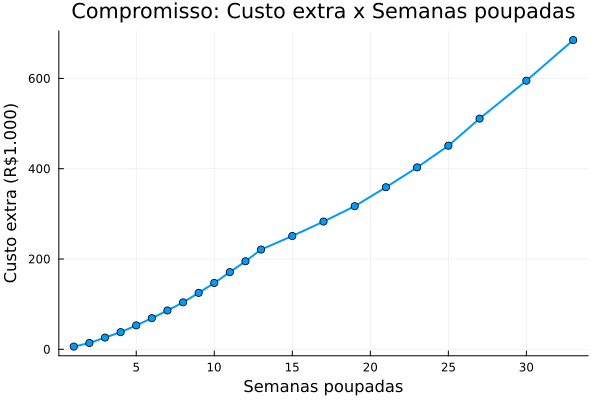

In [65]:
tarefas = Dict(
    2 => (redução_maxima=3, custo_por_semana=30),
    3 => (redução_maxima=1, custo_por_semana=26),
    4 => (redução_maxima=2, custo_por_semana=12),
    5 => (redução_maxima=2, custo_por_semana=17),
    6 => (redução_maxima=1, custo_por_semana=15),
    7 => (redução_maxima=1, custo_por_semana=8),
    9 => (redução_maxima=2, custo_por_semana=42),
    10 => (redução_maxima=1, custo_por_semana=21),
    11 => (redução_maxima=1, custo_por_semana=18),
    14 => (redução_maxima=2, custo_por_semana=22),
    15 => (redução_maxima=2, custo_por_semana=12),
    16 => (redução_maxima=1, custo_por_semana=6),
    17 => (redução_maxima=3, custo_por_semana=16)
)

function calcular_compromisso(tarefas)
    semanas_poupadas = []
    custo_total = []
    
    for tarefa in keys(tarefas)
        redução_maxima, custo_por_semana = tarefas[tarefa]
        for redução in 1:redução_maxima
            push!(semanas_poupadas, redução)
            push!(custo_total, redução * custo_por_semana)
        end
    end
    
    semanas_poupadas = cumsum(sort(semanas_poupadas))
    custo_total = cumsum(sort(custo_total))
    
    return semanas_poupadas, custo_total
end

semanas_poupadas, custo_total = calcular_compromisso(tarefas)

p = plot(semanas_poupadas, custo_total, 
    xlabel="Semanas poupadas", ylabel="Custo extra (R\$1.000)", 
    title="Compromisso: Custo extra x Semanas poupadas", 
    label="", lw=2, marker=:circle, legend=false)

display(p)


In [68]:
tarefas = Dict(
    2 => (redução_maxima=3, custo_por_semana=30),
    3 => (redução_maxima=1, custo_por_semana=26),
    4 => (redução_maxima=2, custo_por_semana=12),
    5 => (redução_maxima=2, custo_por_semana=17),
    6 => (redução_maxima=1, custo_por_semana=15),
    7 => (redução_maxima=1, custo_por_semana=8),
    9 => (redução_maxima=2, custo_por_semana=42),
    10 => (redução_maxima=1, custo_por_semana=21),
    11 => (redução_maxima=1, custo_por_semana=18),
    14 => (redução_maxima=2, custo_por_semana=22),
    15 => (redução_maxima=2, custo_por_semana=12),
    16 => (redução_maxima=1, custo_por_semana=6),
    17 => (redução_maxima=3, custo_por_semana=16)
)

duração_inicial = 64

bonus_por_semana = 30

modelo = Model(GLPK.Optimizer)

@variable(modelo, 0 <= r[2:17])
for i in keys(tarefas)
    set_upper_bound(r[i], tarefas[i][1])
end

@objective(modelo, Max, 
    sum(r[i] * bonus_por_semana for i in keys(tarefas)) - 
    sum(r[i] * tarefas[i][2] for i in keys(tarefas))
)

optimize!(modelo)

melhor_lucro = objective_value(modelo)
melhor_redução = value.(r)

println("Melhor lucro: R\$$melhor_lucro mil")



Melhor lucro: R$242.0 mil


## Problema 10: (Interpretação do dual)

Uma empresa produz 3 tipos de fertilizante, denotados $S,Q,N$. Duas matérias-primas são utilizadas no processo de produção deste fertilizantes, de acordo com os dados na tabela abaixo (quantidades de matérias-primas necessárias [Toneladas por tonelada], disponibilidades das matérias-primas [toneladas] e os preços de venda de cada fertilizante [R\$ por tonelada], supondo que os custos das matérias-primas já estejam incluídos nos preços de venda). Os custos de produção são desconsiderados (por serem pequenos em relação aos demais custos).

|Matéria-prima |  S   |   Q   |  N   | Disponível |
| -----------  | --   |  --   |  --  | --         |
|     1        |  3   |   2.5 |   2  |  1250      |
|     2        |  4   |    2  |   1  |  1000      |
| Preço de venda | 275 | 210  | 175  |            |

1. Qual deveria ser o esquema de produção para maximizar o lucro total? 
2. Qual seria a mudança no lucro total se tivesse uma tonelada a mais de matéria-prima 1 disponível no estoque? E se tivesse uma tonelada a mais de matéria-prima 2?
3. Se o preço de venda do fertilizante $Q$ sobre para 223, há mudança no esquema ótimo de produção que foi encontrado no item 1 acima?

### Solução do Problema 10

In [74]:
modelo = Model(GLPK.Optimizer)

@variable(modelo, x_S >= 0)
@variable(modelo, x_Q >= 0)
@variable(modelo, x_N >= 0)

@objective(modelo, Max, 275 * x_S + 210 * x_Q + 175 * x_N)

@constraint(modelo, 3 * x_S + 2.5 * x_Q + 2 * x_N <= 1250)
@constraint(modelo, 4 * x_S + 2 * x_Q + x_N <= 1000)

optimize!(modelo)

lucro_total = objective_value(modelo)
quantidades = value.(x_S), value.(x_Q), value.(x_N)

println("Esquema de produção ótimo:")
println("Fertilizante S: ", quantidades[1], " toneladas")
println("Fertilizante Q: ", quantidades[2], " toneladas")
println("Fertilizante N: ", quantidades[3], " toneladas")
println("Lucro total: R\$ ", lucro_total)


Esquema de produção ótimo:
Fertilizante S: 150.0 toneladas
Fertilizante Q: 0.0 toneladas
Fertilizante N: 400.0 toneladas
Lucro total: R$ 111250.0


O esquema de produção para maximizar o lucro seria o seguinte: Fertilizante S = 150 toneladas, Fertilizante Q = 0 toneladas e Fertilizante N = 400 toneladas, de forma a faturar 111250 reais como lucro. Aumentando a quantidade em toneladas do que há disponível temos que se a matéria prima 1 tiver mais uma tonelada o maior lucro vai ser feito com o Fertilizante N e se a matéria prima 2 quem possuir mais quantidade, o lucro fica concentrado no Fertilizante S. Aumentar o valor do preço de venda de nenhum Fertilizante altera no esquema ótimo, pois ele depende apenas das retrições, contudo, aumentar o valor do preço de venda, eles fazem mais caro